# Adidas Sales Forecasting
    1. Here we will predict the forecast of Adidas's sales in 2021-2022 using the given 2020-2021 data.
    2. We will analyse the shortcomings of the provided data, points to improve, and comment on each of the different metrics taken to evaluate.
    3. This analysis was done post Power BI visualization, so checking that out beforehand will give a good idea of what this project is about.

### Import Cell Dependencies

In [144]:
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot as plt
import seaborn as sns

In [145]:
df = pd.read_excel("C:/Users/Appa/Downloads/Adidas Sales/Adidas US Sales Datasets.xlsx")

In [146]:
df.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
9,NaN,Foot Locker,1185732,2020-01-06 00:00:00,Northeast,New York,New York,Women's Apparel,50,1000,500000,125000,0.25,In-store


### Data Cleaning and Processing

In [147]:
df.dropna()
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [148]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [149]:
df = df.drop([0, 1, 2], axis = 0)

In [150]:
df = df.dropna()

In [151]:
df.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,9649,9649,9649,9649,9649,9649,9649,9649,9649,9649,9649,9649.00,9649
unique,7,5,725,6,51,53,7,147,362,3513,6511,128.00,4
top,Foot Locker,1185732,2021-01-17 00:00:00,West,Texas,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,5265,77,2448,432,360,1610,557,207,52,34,1229.00,4889


In [152]:
df.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [153]:
df.rename(columns = {'Unnamed: 1':'Retailer', 'Unnamed: 2':'Retailer ID', 'Unnamed: 3':'Invoice Date', 'Unnamed: 4':'Region', 'Unnamed: 5':'State', 'Unnamed: 6':'City', 'Unnamed: 7':'Product', 'Unnamed: 8':'Price Per Unit', 'Unnamed: 9':'Units Sold', 'Unnamed: 10':'Total Sales', 'Unnamed: 11':'Operating Profit', 'Unnamed: 12':'Operating Margin', 'Unnamed: 13':'Sales Method'}, inplace = True)

In [154]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store


In [155]:
df = df.drop([3], axis = 0)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [156]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9647,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9648,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9649,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9650,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [157]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['Total Sales'] = df['Total Sales'].astype('float64')

In [159]:
df.insert(10, "COGS", df['Total Sales']-df['Operating Profit'], True)

In [160]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,COGS,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000.0,300000.0,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000.0,350000.0,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000.0,260000.0,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500.0,248625.0,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000.0,378000.0,162000,0.3,In-store


### Forecasting Specific to a Product

In [166]:
MSF = df[df['Product'] == 'Men\'s Street Footwear'].copy()

In [167]:
MSF.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,COGS,Operating Profit,Operating Margin,Sales Method
9625,Foot Locker,1185732,2021-10-19,Northeast,New Hampshire,Manchester,Men's Street Footwear,52,162,8424.0,4885.92,3538.08,0.42,Outlet
9631,Foot Locker,1185732,2021-11-18,Northeast,New Hampshire,Manchester,Men's Street Footwear,59,149,8791.0,5010.87,3780.13,0.43,Outlet
9637,Foot Locker,1185732,2021-12-17,Northeast,New Hampshire,Manchester,Men's Street Footwear,49,200,9800.0,5194.0,4606,0.47,Outlet
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Street Footwear,36,165,5940.0,3742.2,2197.8,0.37,Outlet
9649,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544.0,4752.72,2791.28,0.37,Outlet


In [168]:
MSF_Costs = MSF['COGS']

In [170]:
MSF.drop(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Price Per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method', 'COGS'], axis = 1, inplace = True)

In [171]:
MSF = MSF.rename(columns = {'Invoice Date':'ds', 'Total Sales':'y'})

### Time Series Forecasting

In [172]:
m = Prophet(interval_width=0.95)

In [173]:
training_run = m.fit(MSF)

09:38:51 - cmdstanpy - INFO - Chain [1] start processing
09:38:51 - cmdstanpy - INFO - Chain [1] done processing


In [174]:
future = m.make_future_dataframe(periods = 200, freq='D')

In [175]:
MSF_forecasted = m.predict(future)

In [176]:
MSF_forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,188086.050000,-165906.391214,534364.107180,188086.050000,188086.050000,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,0.0,0.0,0.0,179311.037276
1,2020-01-02,187905.780372,-125435.322036,537648.733040,187905.780372,187905.780372,16365.094200,16365.094200,16365.094200,16365.094200,16365.094200,16365.094200,0.0,0.0,0.0,204270.874572
2,2020-01-07,187004.432231,-156237.912184,519547.964488,187004.432231,187004.432231,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,0.0,0.0,0.0,191195.025584
3,2020-01-08,186824.162603,-178057.969911,516122.134635,186824.162603,186824.162603,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,0.0,0.0,0.0,178049.149879
4,2020-01-14,185742.544835,-133352.395891,535865.926221,185742.544835,185742.544835,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,0.0,0.0,0.0,189933.138187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,2022-07-11,149256.997029,-195747.218437,488757.520301,140440.006562,157390.046188,1695.375469,1695.375469,1695.375469,1695.375469,1695.375469,1695.375469,0.0,0.0,0.0,150952.372498
560,2022-07-12,149322.796245,-155031.674739,488043.832423,140443.794256,157529.069943,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,4190.593352,0.0,0.0,0.0,153513.389597
561,2022-07-13,149388.595460,-204497.438600,502680.799963,140445.612825,157668.093697,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,-8775.012724,0.0,0.0,0.0,140613.582736
562,2022-07-14,149454.394676,-157653.248376,506544.471094,140447.431394,157802.463164,16365.094200,16365.094200,16365.094200,16365.094200,16365.094200,16365.094200,0.0,0.0,0.0,165819.488876


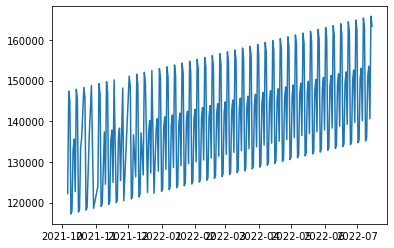

In [177]:
plt.plot(MSF_forecasted['ds'][300:], MSF_forecasted['yhat'][300:])

### Results
    1. As seen the forecasting model has a trend that increases linearly over time.
    2. Also, there is a high fluctuations in the total sales made for Men's Street Footwear because other factors like City, State, Region, Sales method, Retailer, etc. were also implicitly considered in the initial dataset which is the biggest reason behind the fluctuation.
    3. Another reason could be that different sales amounts across the aforementioned features could've happened on the same day and might have massive variation in terms of day-to-day sales.

### Forecasting Specific to a Region

In [179]:
West = df[df['Region'] == 'West'].copy()

In [180]:
West.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,COGS,Operating Profit,Operating Margin,Sales Method
148,West Gear,1128299,2020-11-05,West,California,San Francisco,Men's Apparel,55.0,575,316250.0,158125.0,158125.0,0.5,Outlet
149,West Gear,1128299,2020-11-06,West,California,San Francisco,Women's Apparel,50,775,387500.0,329375.0,58125.0,0.15,Outlet
150,West Gear,1128299,2020-11-07,West,California,San Francisco,Men's Street Footwear,40,825,330000.0,214500.0,115500.0,0.35,Outlet
151,West Gear,1128299,2020-11-08,West,California,San Francisco,Men's Athletic Footwear,50,725,362500.0,290000.0,72500,0.2,Outlet
152,West Gear,1128299,2020-11-09,West,California,San Francisco,Women's Street Footwear,50,725,362500.0,235625.0,126875.0,0.35,Outlet


In [181]:
West.drop(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Price Per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method', 'COGS'], axis = 1, inplace = True)

In [182]:
West = West.rename(columns = {'Invoice Date':'ds', 'Total Sales':'y'})

In [183]:
West

,ds,y
148,2020-11-05,316250.0
149,2020-11-06,387500.0
150,2020-11-07,330000.0
151,2020-11-08,362500.0
152,2020-11-09,362500.0
...,...,...
8999,2021-01-13,2625.0
9000,2021-01-13,3920.0
9001,2021-02-13,3450.0
9002,2021-02-13,3348.0


### Time Series Forecasting

In [187]:
m = Prophet(interval_width=0.95)

In [188]:
training_run = m.fit(West)

10:08:31 - cmdstanpy - INFO - Chain [1] start processing
10:08:31 - cmdstanpy - INFO - Chain [1] done processing


In [189]:
future = m.make_future_dataframe(periods = 200, freq='D')

In [190]:
West_forecasted = m.predict(future)

In [191]:
West_forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-06,107013.795000,-218592.380916,382496.425811,107013.795000,107013.795000,-7647.979692,-7647.979692,-7647.979692,-7647.979692,-7647.979692,-7647.979692,0.0,0.0,0.0,99365.815308
1,2020-01-07,107259.764437,-205903.725226,402307.293412,107259.764437,107259.764437,4949.571474,4949.571474,4949.571474,4949.571474,4949.571474,4949.571474,0.0,0.0,0.0,112209.335911
2,2020-01-08,107505.733873,-195829.066103,370222.556651,107505.733873,107505.733873,-11495.693676,-11495.693676,-11495.693676,-11495.693676,-11495.693676,-11495.693676,0.0,0.0,0.0,96010.040197
3,2020-01-09,107751.703310,-190210.405719,411739.047148,107751.703310,107751.703310,15599.038770,15599.038770,15599.038770,15599.038770,15599.038770,15599.038770,0.0,0.0,0.0,123350.742080
4,2020-01-10,107997.672747,-194780.794481,384157.181917,107997.672747,107997.672747,10990.213634,10990.213634,10990.213634,10990.213634,10990.213634,10990.213634,0.0,0.0,0.0,118987.886381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,2022-07-09,111744.916496,-197145.794574,438563.442367,89715.770014,131124.298625,-2010.153411,-2010.153411,-2010.153411,-2010.153411,-2010.153411,-2010.153411,0.0,0.0,0.0,109734.763085
615,2022-07-10,111765.793299,-198984.304511,408068.894471,89598.201206,131353.024757,-10384.997099,-10384.997099,-10384.997099,-10384.997099,-10384.997099,-10384.997099,0.0,0.0,0.0,101380.796200
616,2022-07-11,111786.670102,-195098.947513,409932.687406,89418.680518,131581.750888,-7647.979692,-7647.979692,-7647.979692,-7647.979692,-7647.979692,-7647.979692,0.0,0.0,0.0,104138.690409
617,2022-07-12,111807.546905,-200835.266628,429128.288883,89263.071350,131777.531313,4949.571474,4949.571474,4949.571474,4949.571474,4949.571474,4949.571474,0.0,0.0,0.0,116757.118379


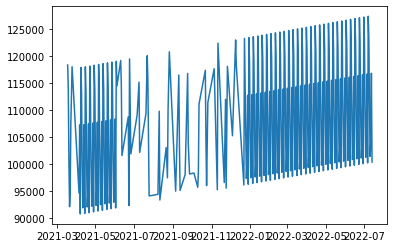

In [276]:
plt.plot(West_forecasted['ds'][300:], West_forecasted['yhat'][300:])

### Results
    1. As we can see, similar trends are discovered, along with variations across different features as mentioned before. The expectation now is that similar issues will be found regardless of taking one large subset. A better analysis in this case would be taking a very specific subset and identifying it's forecast.
    2. The most noticable aspect of this graph is the huge mishap in the middle of the graph. The most likely explanation for this is very minimum data was given along those dates (Note: it is still 2021 data which is known)

In [247]:
specific = df.loc[(df['City'] == 'San Francisco') & (df['Retailer'] == 'West Gear') & (df['Sales Method'] == 'Outlet') & (df['Product'] == 'Men\'s Apparel')]

In [248]:
specific

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit,Units Sold,Total Sales,COGS,Operating Profit,Operating Margin,Sales Method
148,West Gear,1128299,2020-11-05,West,California,San Francisco,Men's Apparel,55.0,575,316250.0,158125.0,158125.0,0.5,Outlet
154,West Gear,1128299,2020-11-11,West,California,San Francisco,Men's Apparel,55.0,500,275000.0,137500.0,137500.0,0.5,Outlet
160,West Gear,1128299,2020-12-23,West,California,San Francisco,Men's Apparel,65,500,325000.0,162500.0,162500,0.5,Outlet
166,West Gear,1128299,2020-12-29,West,California,San Francisco,Men's Apparel,65,525,341250.0,170625.0,170625,0.5,Outlet
172,West Gear,1128299,2021-01-04,West,California,San Francisco,Men's Apparel,65,550,357500.0,160875.0,196625.0,0.55,Outlet
178,West Gear,1128299,2021-01-10,West,California,San Francisco,Men's Apparel,65,575,373750.0,168187.5,205562.5,0.55,Outlet
184,West Gear,1128299,2021-01-16,West,California,San Francisco,Men's Apparel,65,775,503750.0,251875.0,251875,0.5,Outlet
190,West Gear,1128299,2021-01-22,West,California,San Francisco,Men's Apparel,75,750,562500.0,281250.0,281250,0.5,Outlet
196,West Gear,1128299,2021-01-28,West,California,San Francisco,Men's Apparel,65,725,471250.0,259187.5,212062.5,0.45,Outlet
202,West Gear,1128299,2021-02-03,West,California,San Francisco,Men's Apparel,65,650,422500.0,232375.0,190125.0,0.45,Outlet


In [249]:
specific.drop(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Price Per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method', 'COGS'], axis = 1, inplace = True)

C:\Users\Appa\AppData\Local\Temp\ipykernel_35848\3652118603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  specific.drop(['Retailer', 'Retailer ID', 'Region', 'State', 'City', 'Product', 'Price Per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin', 'Sales Method', 'COGS'], axis = 1, inplace = True)


In [250]:
specific = specific.rename(columns = {'Invoice Date':'ds', 'Total Sales':'y'})

In [251]:
specific

,ds,y
148,2020-11-05,316250.0
154,2020-11-11,275000.0
160,2020-12-23,325000.0
166,2020-12-29,341250.0
172,2021-01-04,357500.0
178,2021-01-10,373750.0
184,2021-01-16,503750.0
190,2021-01-22,562500.0
196,2021-01-28,471250.0
202,2021-02-03,422500.0


### Comments
    1. Here we can notice that there is a drastic difference between the sales made as it goes down.
    2. We can also see that the dates of the upper sales and dates of the lower sales match and since they are already specific, the assumption should be that additional sales number were added to the dataset afterwards.
    3. One huge problem is that this could've been another reason for the data fluctuations as Forecasting was made on the same data for two different data points. This can be solved by either summing the common data or removing the later added data.

In [272]:
specific = specific.iloc[0:11]

In [273]:
specific

,ds,y
148,2020-11-05,316250.0
154,2020-11-11,275000.0
160,2020-12-23,325000.0
166,2020-12-29,341250.0
172,2021-01-04,357500.0
178,2021-01-10,373750.0
184,2021-01-16,503750.0
190,2021-01-22,562500.0
196,2021-01-28,471250.0
202,2021-02-03,422500.0


In [297]:
m = Prophet(interval_width=0.95)

In [298]:
training_run = m.fit(specific)

10:54:08 - cmdstanpy - INFO - Chain [1] start processing
10:54:08 - cmdstanpy - INFO - Chain [1] done processing


In [299]:
future = m.make_future_dataframe(periods = 200, freq='D')

In [300]:
specific_forecasted = m.predict(specific)

In [292]:
specific_forecasted

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-11-05,309875.062500,312998.374842,326881.247747,309875.062500,309875.062500,10159.987500,10159.987500,10159.987500,10159.987500,10159.987500,10159.987500,0.0,0.0,0.0,320035.050000
1,2020-11-11,318774.445312,262453.007885,276118.169575,318774.445312,318774.445312,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,0.0,0.0,0.0,269657.739606
2,2020-12-23,381070.106620,324751.003409,338102.981063,381070.106620,381070.106620,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,0.0,0.0,0.0,331953.400913
3,2020-12-29,393777.049306,330519.715513,344560.856491,393777.049306,393777.049306,-56366.394282,-56366.394282,-56366.394282,-56366.394282,-56366.394282,-56366.394282,0.0,0.0,0.0,337410.655024
4,2021-01-04,406483.991952,350597.087228,364419.264481,406483.991952,406483.991952,-48983.977571,-48983.977571,-48983.977571,-48983.977571,-48983.977571,-48983.977571,0.0,0.0,0.0,357500.014381
5,2021-01-10,419190.934709,366422.055048,380879.000044,419190.934709,419190.934709,-45440.735078,-45440.735078,-45440.735078,-45440.735078,-45440.735078,-45440.735078,0.0,0.0,0.0,373750.199630
6,2021-01-16,431897.877406,496955.395224,510601.297161,431897.877406,431897.877406,71852.413922,71852.413922,71852.413922,71852.413922,71852.413922,71852.413922,0.0,0.0,0.0,503750.291328
7,2021-01-22,444604.819351,555663.140653,569989.383102,444604.819351,444604.819351,117895.411216,117895.411216,117895.411216,117895.411216,117895.411216,117895.411216,0.0,0.0,0.0,562500.230567
8,2021-01-28,457305.166405,460969.691733,474201.660769,457305.166405,457305.166405,10159.987500,10159.987500,10159.987500,10159.987500,10159.987500,10159.987500,0.0,0.0,0.0,467465.153905
9,2021-02-03,470005.513459,413518.042317,427833.508946,470005.513459,470005.513459,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,-49116.705706,0.0,0.0,0.0,420888.807752


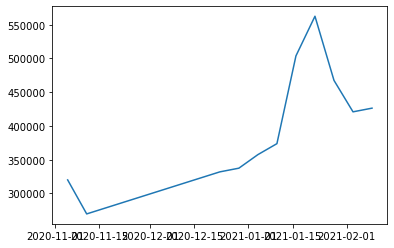

In [301]:
plt.plot(specific_forecasted['ds'], specific_forecasted['yhat'])

### Results
    1. We can see a much clearer trend here as expected for the specific store but since very little data is available the trend is not extrapolated much further.

## Final Comments
    1. As we can see the more the data is narrowed down, the least points are provided to be worked with hence the forecast is a lot weaker and this is a battle between accuracy and durability of the forecast.
    2. Although there is huge variation in total sales across different metrics, the overall trend of the forecast remains the same and continues in an upward trend. A huge reason behind this is the post recovery period from COVID-19 is the focus data group of this analysis hence the upward trend is expected.
    3. With the addition of more data from the upcoming years, specific projections can be made with respect to the different products, outlets, regional variance, etc. and come up with more accurate calculations with avoidance of the aforementioned shortcomings.
    4. In general, analysis of sales and forecasting is very important to devise stratgies and provides evaluation metrics to determine where to focus and what kind of approach is to be taken when it is cross-referenced with the more successful performances. 